In [1]:
"""\
# Copyright (C) 2024 Jesús Bautista Villar <jesbauti20@gmail.com>
- We use this notebook just to test the class where we have enconded all the 
  mathematical expressions for the 2D scalar fields and tools to visualase them -
"""
!python -V || python3 -V

Python 3.11.4


In [ ]:
# If executed from Google Colab --------------------------------------------------------
# !git clone https://github.com/jesusBV20/source_seeking_distr.git
# !rsync -a source_seeking_distr/ .
# !rm -r source_seeking_distr

# If you want to use latex with matplotlib ---------------------------------------------
# !apt install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super
# !pip install -y latex

In [1]:
import numpy as np
import os
import random
import sys

# Graphic tools
import matplotlib.pyplot as plt

# --------------------------------------------------------------------------------------

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Scalar field functions
# from sourceseeking_distr.scalar_field.sigma_common import SigmaField
from sourceseeking_distr.scalar_field.sigma_funcs import SigmaGauss, SigmaNonconvex, SigmaFract 

# Main utility functions used along the notebook
from sourceseeking_distr.toolbox.math_utils import M_rot
from sourceseeking_distr.toolbox.plot_utils import vector2d

# --------------------------------------------------------------------------------------

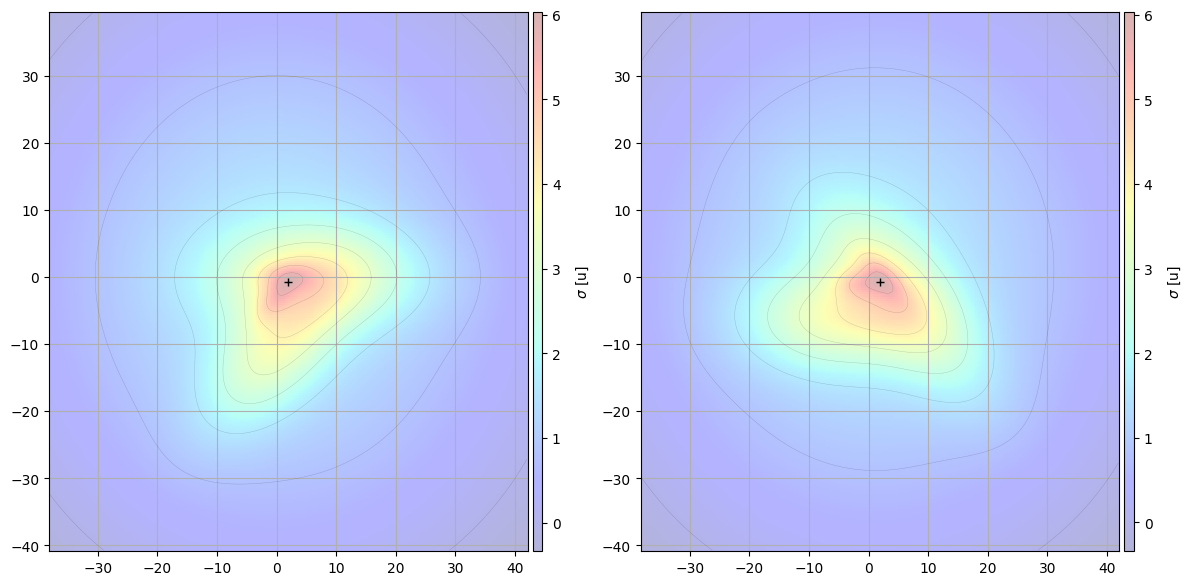

In [2]:
# ----------------------------------------------------------------------
# Testing a non-convex field with one source (sigma_fract)
# ----------------------------------------------------------------------

sigma_test = SigmaFract(k=0.04, dev=[7,2], mu=[0,0])

# --------------------------------------------------------------------------------------

# Generate the plot
fig = plt.figure(figsize=(7*2, 7), dpi=100)
(ax1, ax2) = fig.subplots(1,2)

# Draw the original scalar field
sigma_test.draw(fig=fig, ax=ax1, xlim=40, ylim=40, contour_levels=30)

# Rotate the scalar field
R = M_rot(45 * np.pi / 180)
sigma_test.A = R

# Draw the rotated scalar field
sigma_test.draw(fig=fig, ax=ax2, xlim=40, ylim=40, contour_levels=30)

ax1.grid(True)
ax2.grid(True)
plt.show()

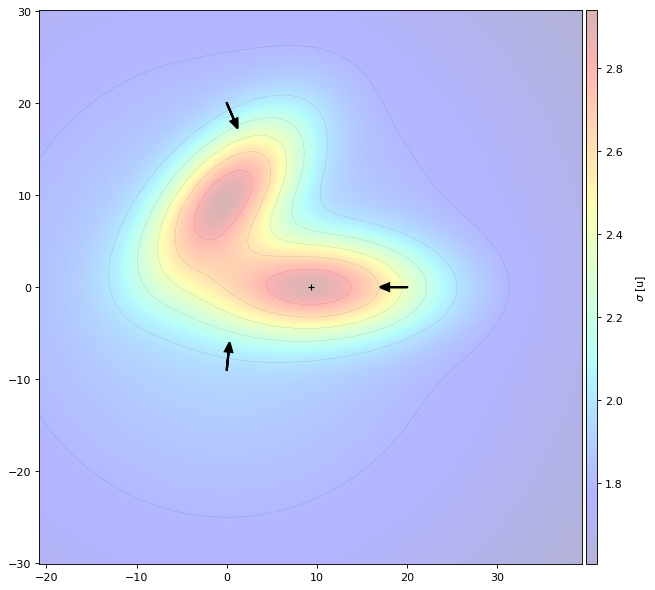

In [3]:
# ----------------------------------------------------------------------
# Testing a non-convex field with two sources (sigma_nonconvex)
# ----------------------------------------------------------------------

# Generate the scalar field
sigma_test = SigmaNonconvex(k=0.04, dev=5, a=[2,0], b=[0,2])

# Generate the plot
fig = plt.figure(figsize=(9, 9), dpi=80)
ax = fig.subplots()

# Draw the scalar field
sigma_test.draw(fig=fig, ax=ax, xlim=30, ylim=30, contour_levels=30)
#sigma_test.draw_imshow(fig, ax)

# Draw multiple gradients
kw_arr = {"s":3, "lw":2, "hw":0.8, "hl":1}
sigma_test.draw_grad([0, 20], ax, kw_arr)
sigma_test.draw_grad([20, 0], ax, kw_arr)
sigma_test.draw_grad([0,-9], ax, kw_arr)

plt.show()

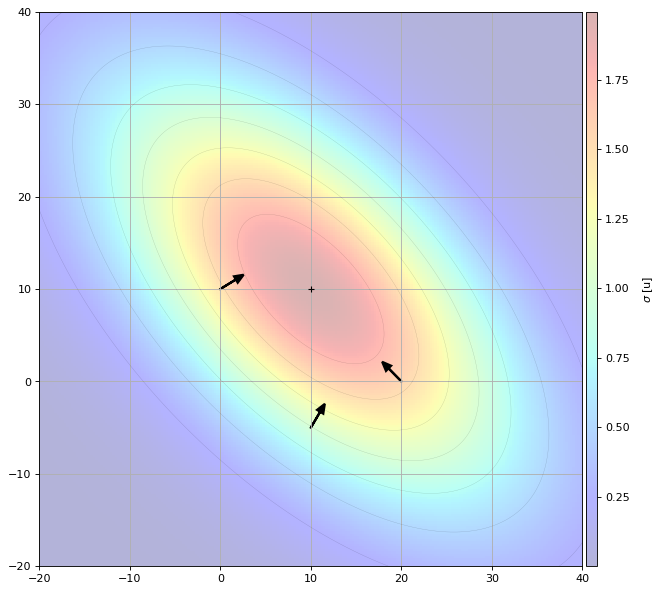

In [4]:
# ----------------------------------------------------------------------
# Testing the gaussian field
# ----------------------------------------------------------------------

max_int = 100
mu = np.array([10,10])
dev = 20

psi = 45 * np.pi / 180
a, b = 2, 1

# Generate the scalar field
S = np.array([[a,0],[0,b]])
R = M_rot(psi)
A = R @ S @ R.T

sigma_test = SigmaGauss(mu=mu, max_intensity=max_int, dev=dev)
sigma_test.A = A

# Generate the plot
fig = plt.figure(figsize=(9, 9), dpi=80)
ax = fig.subplots()

# Draw the scalar field
sigma_test.draw(fig=fig, ax=ax, xlim=40, ylim=40, n=300, contour_levels=20)
ax.set_xlim([-20,40])
ax.set_ylim([-20,40])

# Draw multiple gradients
kw_arr = {"s":3, "lw":2, "hw":0.8, "hl":1}
sigma_test.draw_grad([0,10], ax, kw_arr)
sigma_test.draw_grad([20,0], ax, kw_arr)
sigma_test.draw_grad([10,-5], ax, kw_arr)

ax.grid(True)
plt.show()

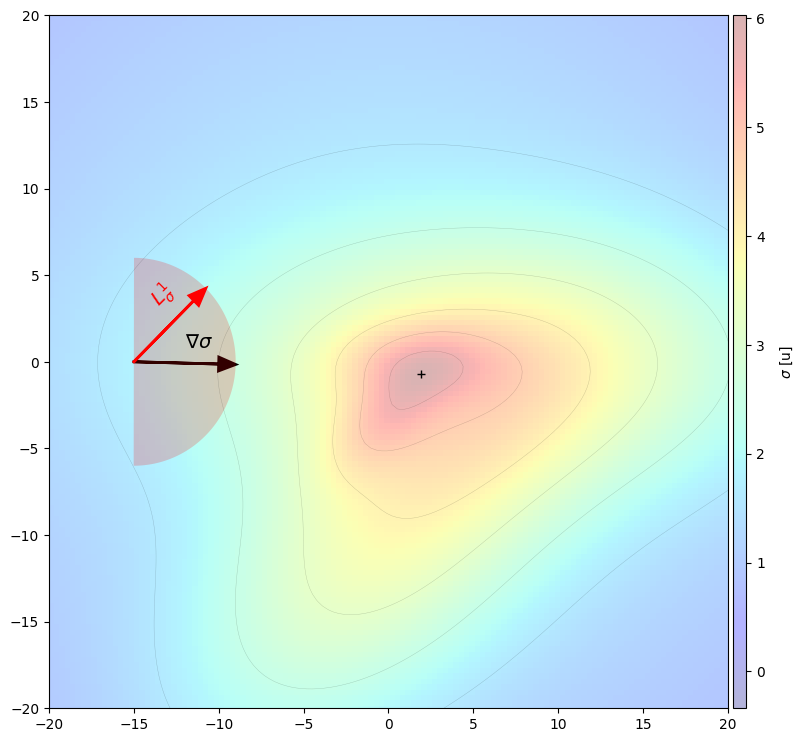

In [6]:
# ----------------------------------------------------------------------
# Figure to compare the actual gradient with L^1
# ----------------------------------------------------------------------

xy_arr = [-15,0]
r_arc = 6

psi = 0 * np.pi / 180

# Generate the scalar field
R = M_rot(psi)

sigma_test = SigmaFract(k=0.04, dev=[7,2], mu=[0,0])
sigma_test.A = R

# Generate the plot
fig = plt.figure(figsize=(9, 9), dpi=100)
ax = fig.subplots()
ax.set_xlim([-20,20])
ax.set_ylim([-20,20])

# Draw the scalar field
sigma_test.draw(fig=fig, ax=ax, xlim=40, ylim=40, contour_levels=20)

# Draw multiple gradients
kw_arr = {"s":r_arc, "lw":2, "hw":0.8, "hl":1}

arr_quiv = sigma_test.draw_grad(xy_arr, ax, kw_arr, ret_arr=False)
vector2d(ax, xy_arr, [np.cos(np.pi/4), np.sin(np.pi/4)], **kw_arr, c="red")

# Draw the blue shape
t_i = np.arctan2((arr_quiv[1]-xy_arr[1]), (arr_quiv[0]-xy_arr[0]))-np.pi/2
t = np.linspace(t_i, t_i+np.pi, 200)
xr, yr = xy_arr[0] + r_arc*np.cos(t), xy_arr[1] + r_arc*np.sin(t)
ax.fill(xr, yr, c="red", alpha=0.2, lw=0)

# Text
ax.text(xy_arr[0]+3, xy_arr[1]+0.8, r"$\nabla\sigma$", fontsize=14, rotation=0)
ax.text(xy_arr[0]+0.7, xy_arr[1]+3.3, r"$L_\sigma^1$", fontsize=14, rotation=180/4, color="red")

plt.show()